# 실습9. perceptron

1. 퍼셉트론을 이용해 or 연산자를 만드세요. (은닉층x) \\
1) 에포크수 Nep=1000, 학습률을 0.3으로 설정하여 퍼셉트론을 학습시키세요. 결과를 출력하여 알맞은 결과가 나왔는지 확인하세요. [20점] \\
2) 에포크 수에 따른 오차의 변화를 그래프로 그리세요. [10점] \\
3) 학습된 퍼셉트론의 confidence map을 X=np.arange(0, 1.1, 0.1), Y=np.arange(0, 1.1, 0.1)에서 그리세요. [20점]

[1 1] 1 0.9993963102437265
[1 0] 1 0.9338647067159418
[0 1] 1 0.9336718308622365
[0 0] 0 0.10719611845945153


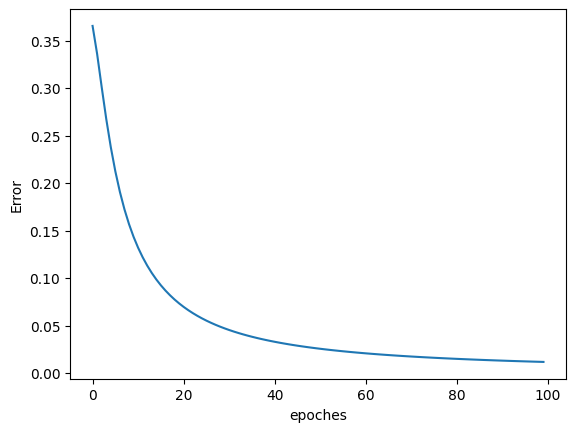

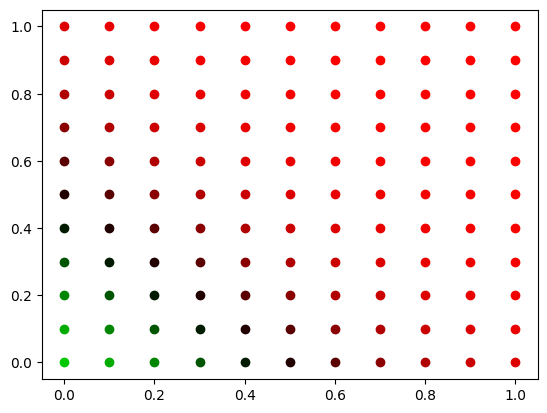

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=4
Nep = 1000
alpha = 0.3

def phi(x):
  return 1.0/(1.0+np.exp(-x))

x_train = np.array([[1,1], [1,0], [0,1], [0,0]])
d_train = np.array([1, 1, 1, 0])
e = np.zeros(4)
w = np.random.random((1,2))
b = np.random.rand()

yarr=[]
for ep in range(Nep):
  for n in range(N):
    x = x_train[n]
    d = d_train[n]
    v = np.sum(w*x) + b
    y = phi(v)

    e = d-y
    w += alpha*e*y*(1-y)*x
    b += alpha*e*y*(1-y)

  if (ep%10 == 0):
    yarr.append(e*e)

for n in range(N):
  v = np.sum(w*x_train[n])+b
  y = phi(v)
  print(x_train[n], d_train[n], y)

plt.plot(yarr)
plt.xlabel('epoches')
plt.ylabel('Error')
plt.show()

X = np.arange(0, 1.1, 0.1); Y = np.arange(0, 1.1, 0.1)
for dx in X:
  for dy in Y:
    x = [dx, dy]
    v = np.sum(w*x) + b
    y = phi(v)
    if round(y): cmap = [2*(y-0.5), 0, 0]
    else: cmap = [0, 2*(0.5-y), 0]
    plt.scatter(dx, dy, color = cmap)

위의 코드는 퍼셉트론을 이용해 or 연산자를 구현한 뒤 에포크 수에 따른 오차의 변화 그래프와 학습된 퍼셉트론의 confidence map을 그리는 코드이다. \\
변수 N은 학습 데이터의 샘플수를 나타내며, 4로 설정하였다. 변수 Nep은 에포크의 수를 나타내며 문제에서 주어진대로 1000으로 설정하였으며, 변수 alpha는 학습률을 나타내고 문제에서 주어진대로 0.3으로 설정하였다. \\
사용자 정의 함수 phi는 시그모이드 함수를 의미하며, x를 입력받아 $\dfrac{1}{1-e^{-x}}$값을 반환한다. 배열 x_train은 학습데이터로, OR게이트를 구현하기 위해 [1,1], [1,0], [0,1], [0,0]의 값으로 구성되어 있다. 배열 d_train은 정답데이터로, OR 게이트의 출력값인 [1,1,1,0]값이 저장되어 있다. 변수 w는 가중치 벡터이며, 2차원 입력이므로 (1,2)의 크기를 가지도록 설정하였다. 변수 b는 바이어스 값으로 numpy모듈의 random.rand를 활용해 임의의 값으로 지정하였다.
리스트 y_arr는 오차를 저장하는 리스트이다. \\
이후 for문을 통해 에포크의 수 만큼 학습과정을 반복시켜 퍼셉트론을 학습시켰다. x는 x_train의 n번째 학습데이터를 저장하고, d는 d_train의 n번째 정답데이터를 저장한다. v는 뉴련의 입력합산값으로, $\sum W_{i}x_i+b$를 나타낸다. y는 시그모이드 함수를 통과한 출력값을 나타내며, e는 참값과 y값의 차이를 저장한다. 이후 경사하강법을 이용해 w값과 b값을 업데이트 한다. 코드내의

```
    w += alpha*e*y*(1-y)*x
    b += alpha*e*y*(1-y)
```
는 퍼셉트론 학습과정의 $$W_{ij} \rightarrow +\alpha e_iy_i(1-y_i)x_j \\ b_i \rightarrow b_i+\alpha e_iy_i(1-y_i)$$
과정을 의미한다. 이때 10개의 epoch마다 에러값의 제곱값을 yarr에 저장한다. \\
퍼셉트론의 학습과정이 끝난 뒤 for문을 활용해 학습된 W가 학습데이터 x_train에 대해 계산된 결과 y를 출력하도록 하였으며, 에포크의 수에 따른 오차제곱값을 나타내는 그래프와 학습된 퍼셉트론의 confidence map을 나타내었다. 이때 출력값이 true이면 빨간색, false이면 초록색이 출력되도록 하였다. 위의 과정을 통해 도출해낸 그래프를 통해 epoch수가 늘어남에 따라 오차가 줄어듦을 알 수 있었으며, confidence map에서 [1,1], [1,0], [0,1]은 true, [0,0]은 false값을 가짐을 알 수 있다.



2. 퍼셉트론을 이용해 xnor 연산자를 만드세요. (하나의 은닉층 포함) \\
1) 에포크수 Nep=4000, 학습률을 0.5로 설정하여 퍼셉트론을 학습시키세요. 결과를 출력하여 알맞은 결과가 나왔는지 확인하세요. [20점] \\
2) 에포크 수에 따른 오차의 변화를 그래프로 그리세요. [10점] \\
3) 학습된 퍼셉트론의 confidence map을 X=np.arange(0, 1.1, 0.1), Y=np.arange(0, 1.1, 0.1)에서 그리세요. [20점]

[1 1] 1 [[0.96746369]]
[1 0] 0 [[0.03094865]]
[0 1] 0 [[0.03094509]]
[0 0] 1 [[0.96498611]]


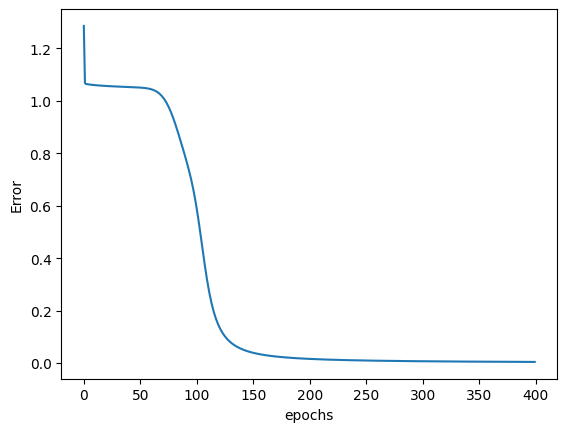

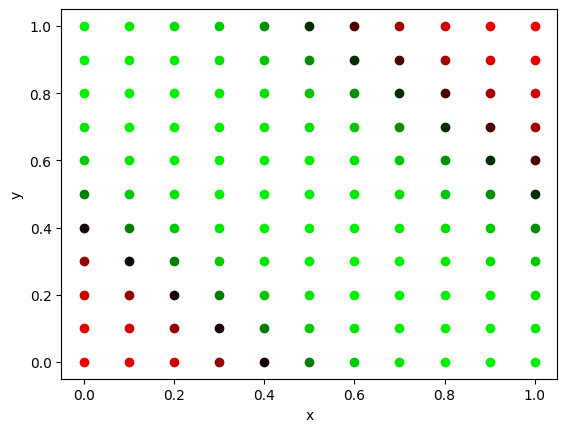

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=4
Nep=4000
alpha=0.5

def phi(x):
    return 1.0/(1+np.exp(-x))

x_train=np.array([[1,1],[1,0], [0,1], [0,0]])
d_train=np.array([1,0,0,1])
e=np.zeros(4)

w=np.random.random((2,2))
b=np.random.random((2,1))
V=np.random.random((1,2))
c=np.random.rand()

error_arr=[];
for ep in range(Nep):
    sum_e=0
    for n in range(N):
        x=np.reshape(x_train[n],(2,1))
        d=d_train[n]

        v=w@x+b; y=phi(v)
        s=V@y+c; z=phi(s)
        e=d-z
        sum_e+=np.ndarray.item(e*e)

        delta=z*(1-z)*e
        el=V.T@delta
        epsil=y*(1-y)*el

        V+=alpha*delta*y.T; c+=alpha*delta
        w+=alpha*epsil@x.T; b+=alpha*epsil

    if ep%10==0:
        error_arr.append(sum_e)

for n in range(N):
    x=np.reshape(x_train[n],(2,1))
    d=d_train[n]
    v=w@x+b; y=phi(v)
    s=V@y+c; z=phi(s)
    print(x_train[n],d_train[n],z)

plt.plot(error_arr)
plt.ylabel('Error')
plt.xlabel('epochs')
plt.show()

xlist=np.arange(0,1.1,0.1); ylist=np.arange(0,1.1,0.1)
for dx in xlist:
    for dy in ylist:
        x=np.reshape([dx,dy],(2,1))
        v=w@x+b; y=phi(v)
        s=V@y+c; z=phi(s)
        z=np.ndarray.item(z)
        if round(z): label=[2*(z-0.5),0,0]
        else: label=[0, 2*(0.5-z), 0]
        plt.scatter(dx,dy,color=label)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

위의 코드는 퍼셉트론을 이용해 xnor 연산자를 구현한 뒤 에포크 수에 따른 오차의 변화 그래프와 학습된 퍼셉트론의 confidence map을 그리는 코드이다. \\
변수 N은 학습 데이터의 샘플수를 나타내며, 4로 설정하였다. 변수 Nep은 에포크의 수를 나타내며 문제에서 주어진대로 4000으로 설정하였으며, 변수 alpha는 학습률을 나타내며 문제에서 주어진대로 0.5으로 설정하였다. \\
사용자 정의 함수 phi는 시그모이드 함수를 의미하며, x를 입력받아 $\dfrac{1}{1-e^{-x}}$값을 반환한다. 배열 x_train은 학습데이터로, XNOR게이트를 구현하기 위해 [1,1], [1,0], [0,1], [0,0]의 값으로 구성되어 있다. 배열 d_train은 정답데이터로, XNOR 게이트의 출력값인 [1,0,0,1]값이 저장되어 있다. 변수 w는 입력층과 은닉층 사이의 가중치 벡터이며, (2,2)의 크기를 가지도록 설정하였다. 변수 b는 은닉층의 바이어스 값으로 (2,1)크기의 임의의 값으로 지정하였다. 변수 V는 은닉층과 출력층 사이의 가중치 행렬로 (1,2)의 크기를 갖도록 설정하였다. 변수 c는 출력층의 바이어스를 의미한다. 리스트 error_arr는 오차를 저장하는 리스트이다. \\
이후 for문을 통해 에포크의 수 만큼 학습과정을 반복시켜 퍼셉트론을 학습시켰다. x는 x_train의 n번째 학습데이터를 저장하고, d는 d_train의 n번째 정답데이터를 저장한다. 변수 v는 입력층에서 은닉층으로의 뉴련의 입력합산값을 나타내며, y는 시그모이드 함수를 통과한 출력값을 나타낸다. 변수 s는 은닉층에서 출력층으로의 뉴런의 입력합산값을 나타내며, 변수 z는 시그모이드 함수를 통과한 최종 출력값을 나타낸다. 변수 e는 참값(d)과 z값의 차이를 저장한다. 변수 sum_e는 모든 데이터에 대해 오차의 제곱값을 누적하여 더한 값이다. \\
이후 경사하강법을 이용해 w, b, V, c값을 업데이트 한다. 코드내의

```
        delta=z*(1-z)*e
        el=V.T@delta
        epsil=y*(1-y)*el

        V+=alpha*delta*y.T; c+=alpha*delta
        w+=alpha*epsil@x.T; b+=alpha*epsil
```
는 퍼셉트론 학습과정의 $$V_{ij} \rightarrow V_{ij}+ \alpha \delta_iy_j \\ c_i \rightarrow c_i + \alpha\delta_i \\ W_{ij} \rightarrow +\alpha \epsilon_i x_j \\ b_i \rightarrow b_i+\alpha \epsilon_i$$
과정을 의미한다. 이때 10개의 epoch마다 에러의 제곱합을 error_arr에 저장한다. \\
퍼셉트론의 학습과정이 끝난 뒤 for문을 활용해 학습된 퍼셉트론 모델이 학습데이터 x_train에 대해 계산된 결과 z를 출력하도록 하였으며, 에포크의 수에 따른 오차제곱값을 나타내는 그래프와 학습된 퍼셉트론의 confidence map을 나타내었다. 이때 출력값이 true이면 빨간색, false이면 초록색이 출력되도록 하였다. 위의 과정을 통해 도출해낸 그래프를 통해 epoch수가 늘어남에 따라 오차가 줄어듦을 알 수 있었으며, confidence map에서 [1,1], [0,0]은 true, [1,0], [0,1]은 false값을 가짐을 알 수 있다.